In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()

print(digits.keys())
print(digits['data'].shape)
print(digits['target'].shape)
print(digits['images'].shape)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)
(1797, 8, 8)


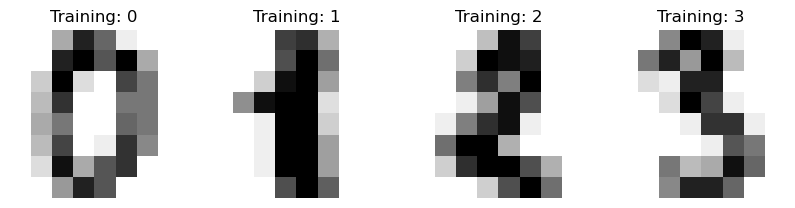

In [2]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [11]:
# essayons de grapper ces données d’images
N = digits['data']
km = KMeans(n_clusters=10, random_state=37, n_init='auto')
km.fit(N)

print(km.labels_[:20])
print(digits['target'][:20])


[0 8 8 1 2 6 4 3 8 6 0 5 7 1 2 9 4 3 8 6]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


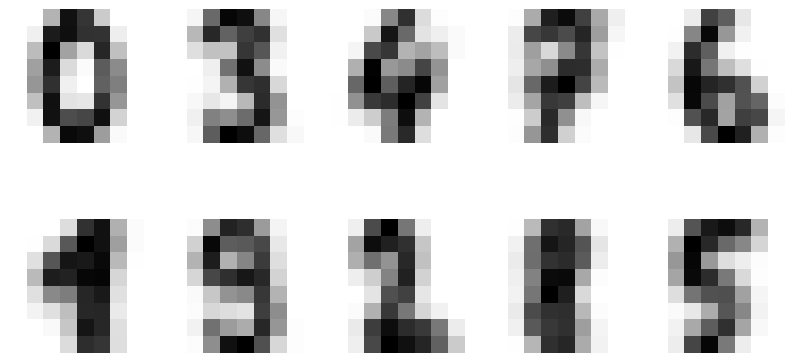

In [12]:
# création d’une matrice 8x8 à partir des centers de kmeans
centers = [np.reshape(c, (-1,8)) for c in km.cluster_centers_]

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for axe, image in zip(axes.reshape(1,10)[0], centers):
    axe.set_axis_off()
    axe.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")